<h1 style="text-align: center;">Data Mining Project 3: Link Analysis</h1>

<p style="text-align:center;">
    呂伯駿<br>
    Q56074085<br>
    NetDB<br>
    National Cheng Kung University<br>
    pclu@netdb.csie.ncku.edu.tw
</p>


## 1. Introduction

本次報告的目的是了解 HIT, PageRank, SimRank 等算法的特性，觀察不同性質與規模之 Graph 其 Hubs, authority, PageRank 與 Simrank 的變化，並透過增減 links 實驗觀察參數對數值的影響。


## 2. Environment

這個部分我將會說明實驗所使用的環境與使用資料集。

### 2.1 System Preferences

實驗環境如下：
- <b>Operating System</b>: macOS High Mojave (10.14.1)
- <b>CPU</b>: 1.3 GHz Intel Core i5
- <b>Memory</b>: 8 GB 1600 MHz DDR3
- <b>Programming Language</b> : Python 3.6.2

由於所用之 Graph Data 最多僅有 5220 個Link，實驗環境記憶體足以符合實驗需求。

### 2.2 Dataset

#### 資料參數：

實驗使用 7 種 不同參數之 Graph，其 nodes 數目與 links 數目如下表：


| Graph ID   |     Nodes      |  Edges |
|----------|:-------------:|------:|
| 1 |  6 | 5  |
| 2 |  5 | 5  |
| 3 |  4 | 6  |
| 4 |  7 |  18 |
| 5 | 469  |  1102 |
| 6 |  1228 | 5220  |
| 7 |  2316 | 4714  |

Graph 7 為 Project 1 所使用之 IBM transaction 資料，將每筆資料中的 item 兩兩拆解為 edge。

#### 資料模式：
其中前四個 Graph 如 Fig.1, Fig.2, Fig.3, Fig.4 顯示。
![image](https://user-images.githubusercontent.com/7900936/50402856-c5880e00-07d4-11e9-88dc-d3e28066cfe9.png)



## 3. Implementation

### 3.1 HITS

HITS 透過計算 hub 與 authority 來評估網頁重要性。 實作上先將所有 hub 與 authority 初始化為 1，再使用 numpy 的矩陣運算來計算 a = A^T h, h = A a ，EPSILON 則設定為 0.001。 其時間複雜度為 O(|E(G)|)。

![image](https://user-images.githubusercontent.com/7900936/50407213-9d68d100-080d-11e9-9720-56da2159daed.png)

其算法的缺點是穩定性低，加減幾個 edge 對結果影響較高，且容易靠作弊提高頁面分數，搜尋開始後才進行運算的特性也不符合即時的搜索需求。

### 3.2 PageRank

DAMPING_FACTOR 預設為 0.15，EPSILON 則設定為 0.001，為了預防 graph cycle 使算法出現 unlimit distance 問題，實作上並未如實遞迴運算每個 parents 的 PageRank，而是在每個迴圈中更新一次 PageRank數值。 其時間複雜度為 O(log(n/ϵ))。

![image](https://user-images.githubusercontent.com/7900936/50407200-6c889c00-080d-11e9-9cd7-82edfd63eaa8.png)

其算法的缺點是舊的頁面其PageRank通常會比新的頁面高，而 Google 2016 時也從工具列中移除此資料。

### 3.3 SimRank

SimRank 是一種透過不斷拓墣來運算兩 node 之關聯性之算法。 本次實作上 C 設定為 0.5，為了預防 graph cycle 使算法出現 Rank Sink 問題，實作上多加上一個遞迴層數限制，若遞迴運算曾數超過十層時則直接回傳 0。 其時間複雜度非常高，為 O(K|E|^2)，實務上較無法採用。

![image](https://user-images.githubusercontent.com/7900936/50407207-80340280-080d-11e9-891b-454b57b8354f.png)



## 4. Analysis
本章節為算法之實驗結果，其中 4.1 將會探討 Graph 1~7 的 HIT 與 PageRank 結果，4.2 為 Graph 1~5 之 SimRank 數值，4.3 則嘗試透過增加 link 的方式提高 node 1 的hub, authority 與 pagerank 數值，4.4 則探討算法的效率。

<Figure size 1440x1440 with 0 Axes>

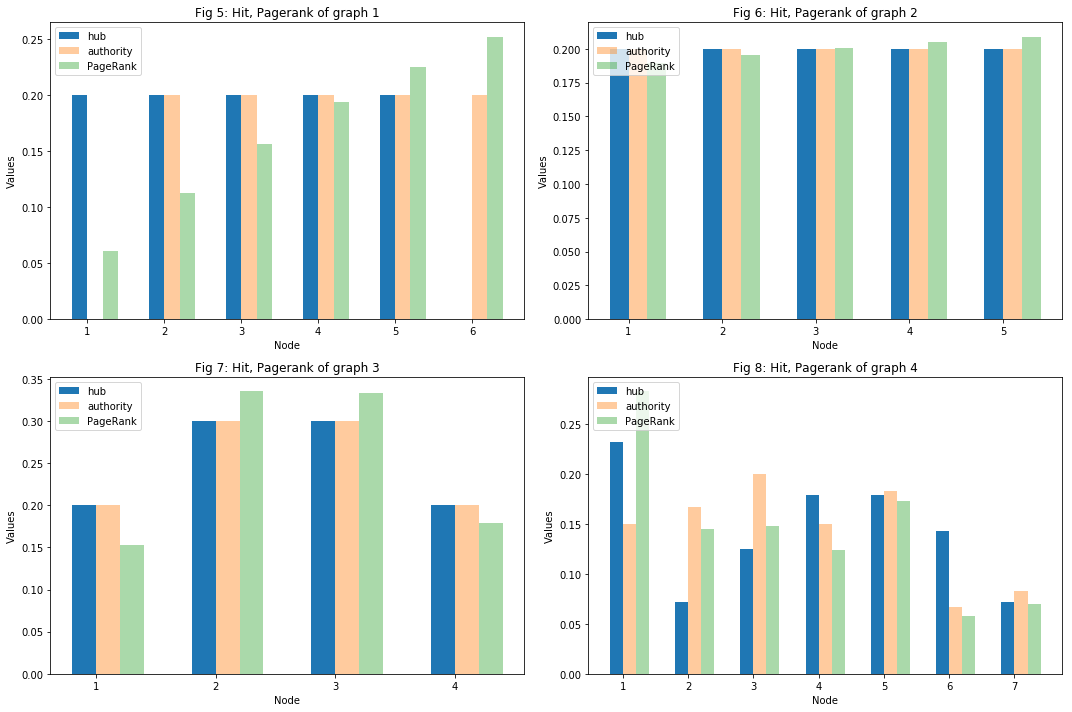

In [172]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
def show_basic_results(graph_id, labels, title, ax):
    legends = ['hub', 'authority', 'PageRank']

    base_path = 'exp/graph_' + str(graph_id)
    result = pd.read_csv(base_path + '/origin.csv')

    x = result['node']
    y_1 = result['hubs']
    y_2 = result['authorities']
    y_3 = result['pagerank']

    bar_width = 0.2
    opacity = 0.4
    ax.bar(x, y_1, bar_width, label='hub')
    ax.bar(x + bar_width, y_2, bar_width, alpha=opacity, label='authority')
    ax.bar(x + bar_width*2, y_3, bar_width, alpha=opacity, label='PageRank')
    
    ax.set_xlabel('Node')
    ax.set_ylabel('Values')
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(labels)
    ax.legend(legends, loc=2)
    ax.set_title(title)

def show_full_results(fig_num):
    label_group = [
        ('1','2','3','4','5','6'),
        ('1','2','3','4','5'),
        ('1','2','3','4'),
        ('1','2','3','4','5','6','7')
    ]

    fig, ax = plt.subplots(2,2,figsize=(15,10))
    index = [[0,0],[0,1],[1,0],[1,1]]

    for graph_id in range(4):
        title = f'Fig {fig_num}: Hit, Pagerank of graph {graph_id+1}'
        labels = label_group[graph_id]
        r = index[graph_id][0]
        c = index[graph_id][1]
        show_basic_results(graph_id+1, labels, title, ax[r,c])
        fig_num += 1


show_full_results(5)
plt.tight_layout()
plt.show()

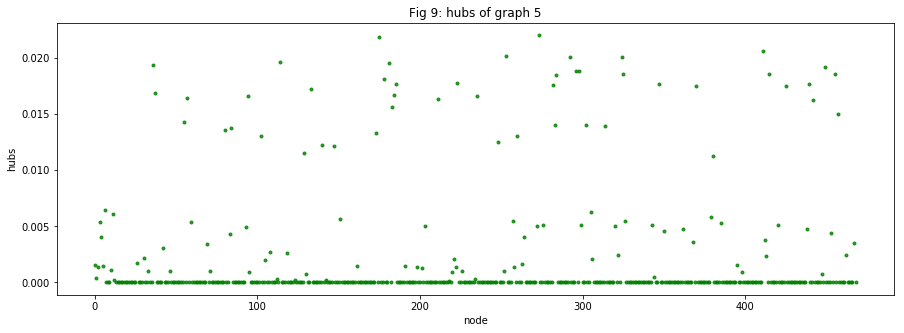

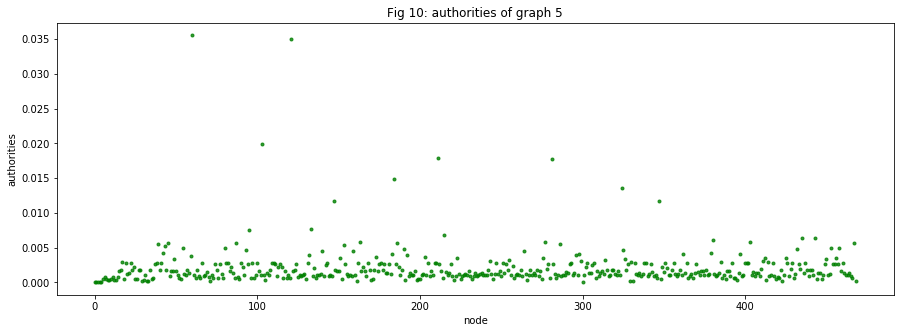

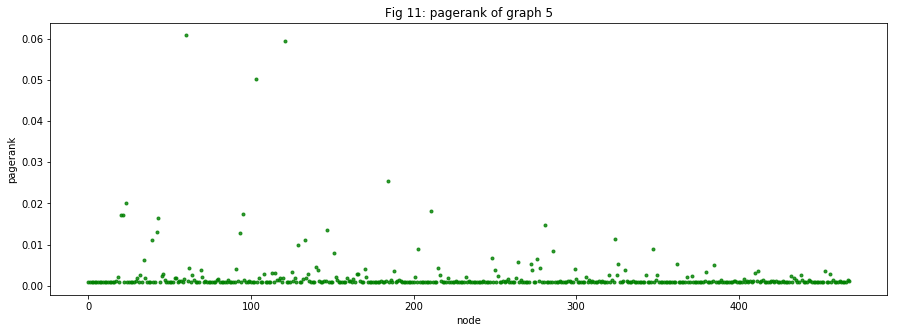

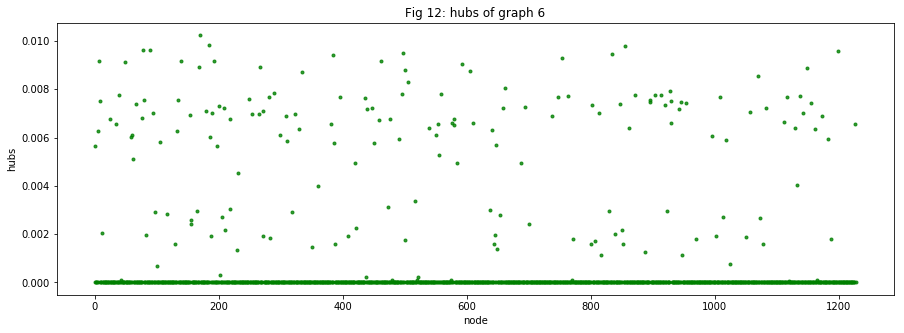

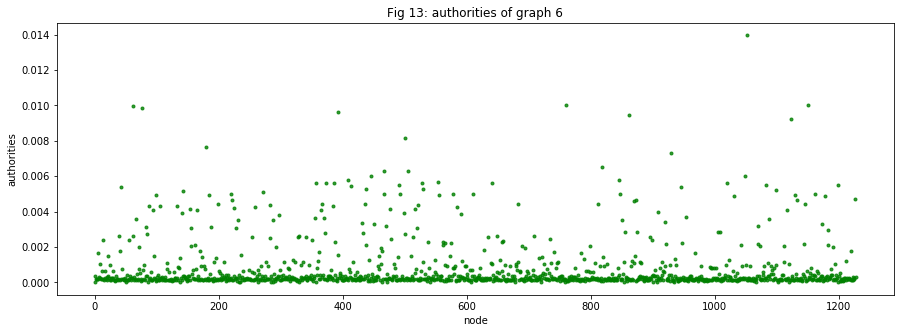

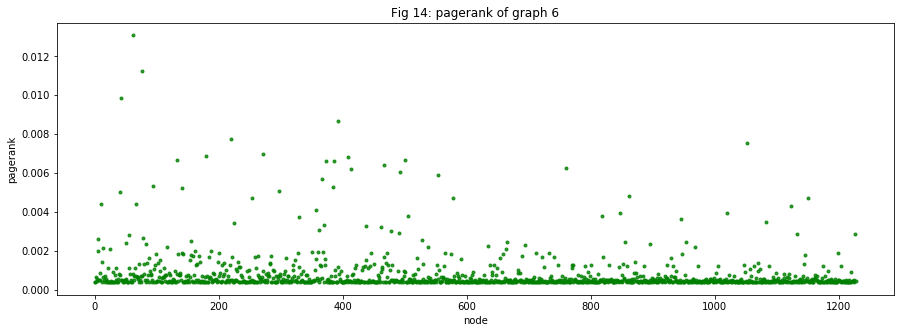

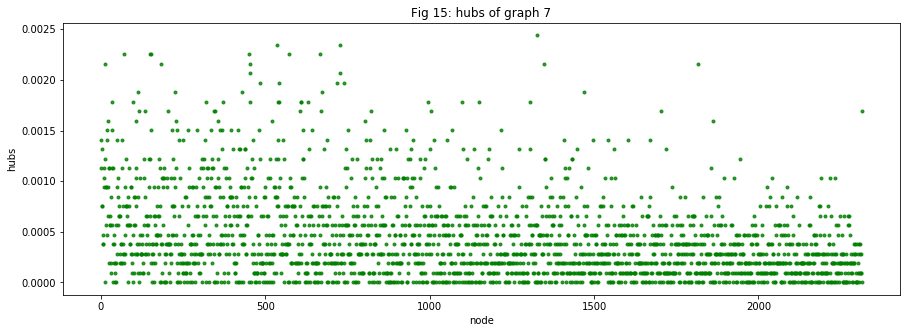

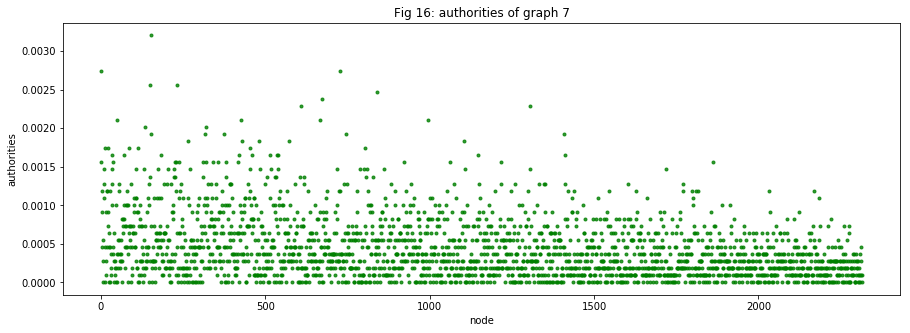

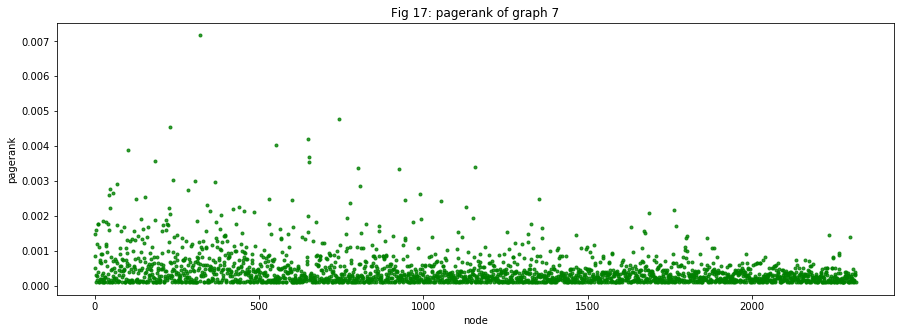

In [211]:
def show_large_results(graph_id, value, title):
    graph = pd.read_csv(f'exp/graph_{graph_id}/origin.csv')
    plt.figure(figsize=(15, 5))
    x = graph['node']
    y = graph[value]
    plt.xlabel('node')
    plt.ylabel(value)
    plt.title(title);
    plt.plot(x, y, 'g.', alpha=0.8)
    plt.show()

def show_all_large_results(fig_num):
    values = ['hubs', 'authorities', 'pagerank']
    for graph_id in range(3):
        for value in values:
            title = f'Fig {fig_num}: {value} of graph {graph_id+5}'
            show_large_results(graph_id+5, value, title)
            fig_num += 1


show_all_large_results(9)

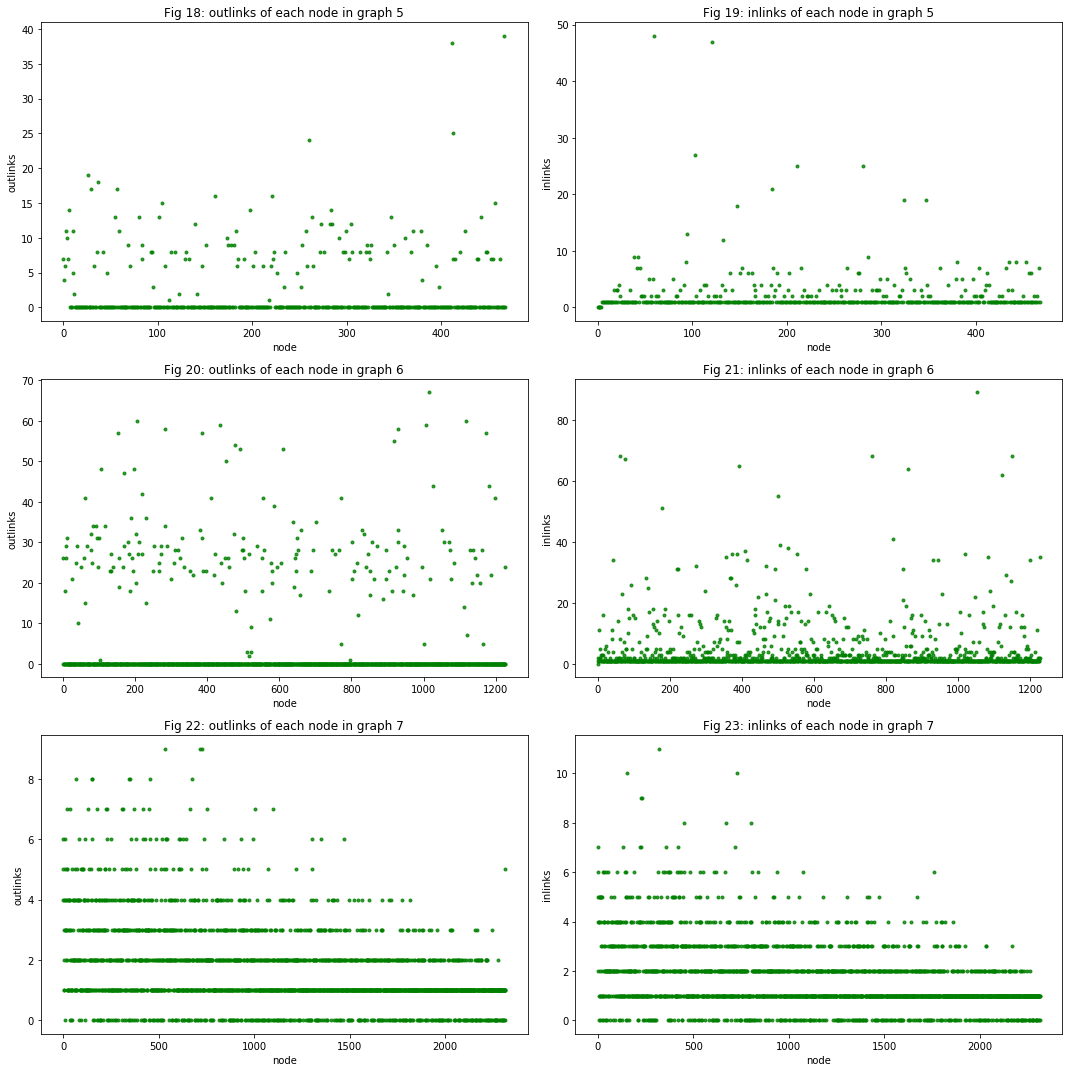

In [210]:

# show inlinks counts & outlinks counts of nodes
def show_counts(graph_id, value, title, index):
    counts = pd.read_csv(f'exp/graph_{graph_id}/link_counts.csv')
    plt.subplot(index)
    x = counts.shape[0]
    y = counts[value]
    plt.xlabel('node')
    plt.ylabel(value)
    plt.title(title);
    plt.plot(range(x), y, 'g.', alpha=0.8)

def show_all_counts(fig_num):
    values = ['outlinks', 'inlinks']
    index = 321
    for graph_id in range(3):
        for value in values:
            title = f'Fig {fig_num}: {value} of each node in graph {graph_id+5}'
            show_counts(graph_id+5, value, title, index)
            fig_num += 1
            index += 1

plt.figure(figsize=(15, 15))
show_all_counts(18)
plt.tight_layout()
plt.show()



### 4.1 HITS & Page Rank Results


Graph 1 為單向 Graph, 從 Fig.5 可觀察到其 Hub 與 Authority 除沒有 child 或 parent 的 node 之外皆相同，而 PageRank 則因為 damping 項的關係，parents 越多則 page rank 越高。

Graph 2 為單向有環的 Graph，從 Fig.6中可發現 其 Hub 與 Authority 由於 node 等價數值皆相同，PageRank 數值雖從圖表上有些微差異，但這是因為 recursive 趨近的關係，其PageRank數值最終將會相同。

Graph 3 則是多環的 Graph, 從 Fig.7 看來其中連接最多的 node 2, node 3 有最高的 hub, authority 與 PageRank。

Graph 4 則是多環且較複雜的 Graph，從 Fig.8 可得其中 inlinks 與 outlinks 數目最多的 node 1 有最高的 hub 與 PageRank 值，而僅有單一 parent 與 child 的 node 7 其數值皆最低，而 node 3 的 Authority 最高，原因是其所被連接 node 4, 5, 1 其 hub 數值相對較高的。

Graph 5 node 數目達到 460，Edge 數目達到 1100，從 Fig.9,10 可以觀察到絕大多數的 node Authority 較低，hub 則較無這種現象，可以推測這些 hub 較高的 node 其所連接的 node 通常集中在少數 node，而這點也從 Fig.19 Graph 5 每個 node 的 inlinks 數目圖中證實。
而 PageRank 的數值高低則與 Authority 大致符合。

Graph 6 node 數目進一步提高到 1228, edge 數則到達 5220 其數值顯示於 Fig.12~14 。 由於 node 數目增加，個別 hub 與 authority 數值因為正規化而減少， Graph 6 中 較高 authority 的 node 比例較 graph 5 多，但其 PageRank 數值與 Authority 數值之關聯並不如 Graph 5高，根據 Fig.20,21 判斷是因為 Graph 6 outlink 與 inlink 的 node 較為分散的關係。


Graph 7 採用 IBM 合成資料， 若觀察 Fig.22, 23 亦可發現每個 node inlink 數目與 outlink 數目是大致相同的， 而這樣表現出的數值從Fig.15~17 可觀察到其 Hub 與 authority 具有一定的 pattern，而 PageRank 則與 Authority 趨勢大致相符，多數 node 的 PageRank 幾乎為零。


### 4.2 SimRank Results

以下為各個 Graph 運算SimRank的時間與數值 <br>
node_1 表示第一個 compare 的 node
authority_1 表示第一個 compare 的 node 的 authority 數值 <br>
parents_num_1 表示第一個 compare 的 node 的 parent node 數目 <br>

| graph_id | node_1 | node_2 | authority_1 | authority_2 | parents_num_1 | parents_num_2 | SimRank | time   | 
|----------|--------|--------|-------------|-------------|---------------|---------------|---------|--------| 
| 1        | 1      | 2      | 0.2         | 0.2         | 1             | 1             | 0       | 0.0001 | 
| 2        | 1      | 2      | 0.2         | 0.2         | 1             | 1             | 0       | 0.0001 | 
| 3        | 1      | 4      | 0.2         | 0.2         | 1             | 1             | 0       | 0.0002 | 
| 3        | 1      | 2      | 0.2         | 0.3         | 1             | 2             | 0       | 0.0004 | 
| 3        | 2      | 3      | 0.3         | 0.3         | 2             | 2             | 0       | 0.0009 | 
| 4        | 1      | 4      | 0.15        | 0.15        | 6             | 2             | 0.11    | 1.26   | 
| 4        | 3      | 5      | 0.18        | 0.18        | 3             | 4             | 0.2     | 0.8    | 
| 4        | 4      | 7      | 0.15        | 0.08        | 2             | 1             | 0.05    | 0.8    | 
| 5        | 95     | 133    | 0.007       | 0.007       | 8             | 1             | ?       | > 600   | 

其中 graph 1 ~ 3 由於 cycle 及單向圖，其運算 SimRank 皆為 0。
而 Graph 4 的 SimRank 開始有數值，我們可以發現其計算時間與 兩 node 的 parent_num 的數目有關。
雖然 node 1,4 有 3個共同 parent，但因為inlink數目較多，所以SimRank數值較 node 3,5 要低。

至於 Graph 5 由於運行時間過久，不呈現數值於此表中。


### 4.3 Methods to Increase hub, authority,  and PageRank

本小節嘗試透過增減 links 與 nodes 來增加 node 1 的 hub, authority, and PageRank。


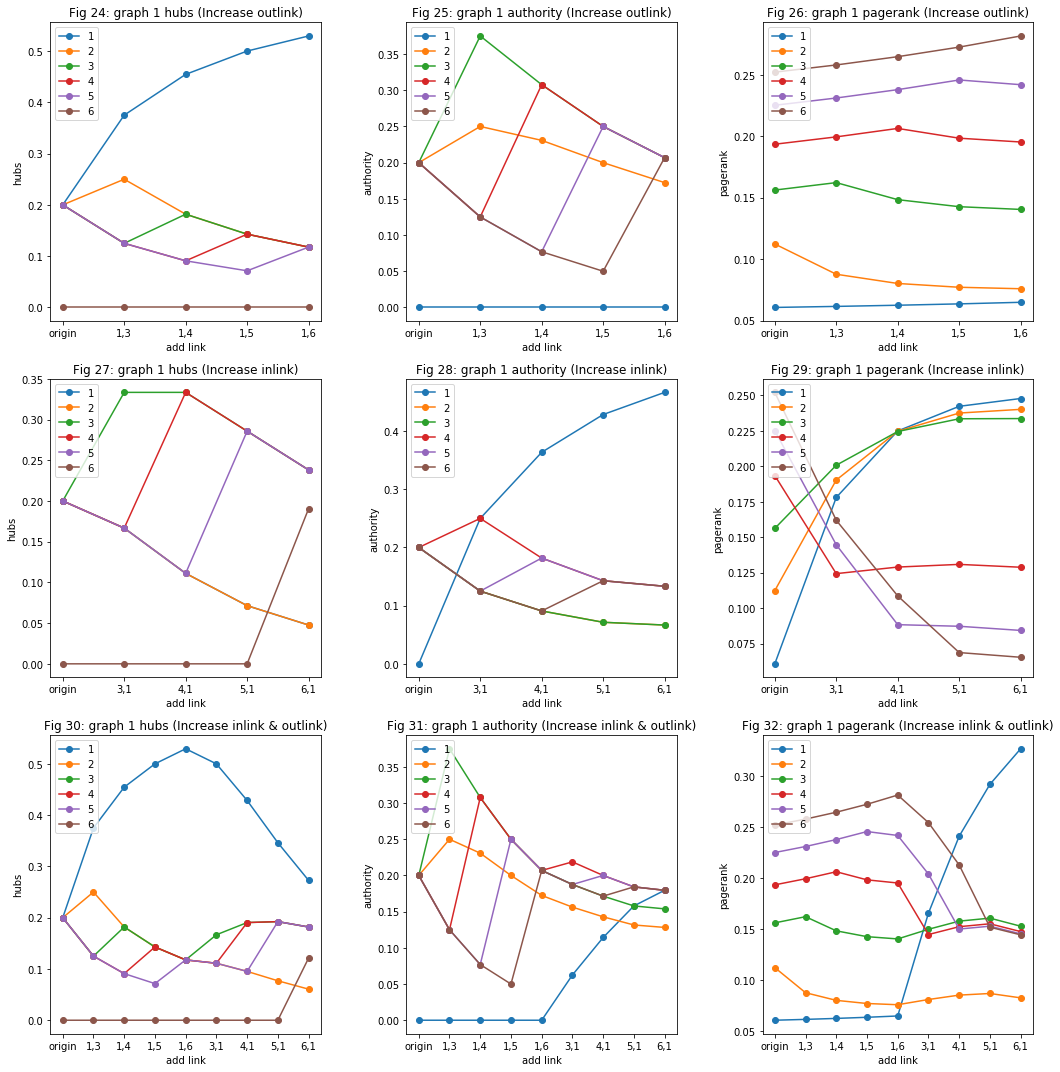

In [212]:

plt.figure(figsize=(15, 15))
def get_increase_exp_data(graph_id):
    base_path = f'exp/graph_{graph_id}'
    return {
        'in': {
            'hubs': pd.read_csv(base_path + '/in/hubs.csv'),
            'authority': pd.read_csv(base_path + '/in/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/in/pagerank.csv'),
        },
        'out': {
            'hubs': pd.read_csv(base_path + '/out/hubs.csv'),
            'authority': pd.read_csv(base_path + '/out/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/out/pagerank.csv'),
        },
        'both': {
            'hubs': pd.read_csv(base_path + '/both/hubs.csv'),
            'authority': pd.read_csv(base_path + '/both/authority.csv'),
            'pagerank': pd.read_csv(base_path + '/both/pagerank.csv'),
        }
    }

# plot single figure
def show_results(data, link_type, f1_config, index):
    value = f1_config['value']
    legends = f1_config['legends']
    title = f1_config['title']
    
    plt.subplot(index)
    x = list(data[link_type][value]['add_link'])
    x[0] = 'origin'

    # plot exp results
    for legend in legends:
        real_node = str(int(legend) - 1)
        y = data[link_type][value][real_node]
        plt.plot(x, y, 'o-')
    
    plt.xlabel('add link')
    plt.ylabel(value)
    plt.legend(legends, loc=2);
    plt.title(title);

# plot 9 figure
def show_graph_results(legends, graph_id, fig_num):
    link_type = ['out', 'in', 'both']
    values = ['hubs', 'authority', 'pagerank']
    add_types = ['out', 'in', 'both']
    add_links = ['outlink', 'inlink', 'inlink & outlink']

    data = get_increase_exp_data(graph_id)
    f_index = 331
    for type_id, add_type in enumerate(add_types):
        for id, value in enumerate(values):
           
            f_config = {
                'value': value,
                'legends': legends,
                'title': f'Fig {fig_num}: graph {graph_id} {value} (Increase {add_links[type_id]})'
            }
            show_results(data, add_type, f_config, str(f_index))
            fig_num += 1
            f_index += 1
        
#
# Fig 1 ~ Fig 9
#

legends = ['1','2','3','4','5','6']
show_graph_results(legends, 1, 24)

# Plot
plt.tight_layout()
plt.show()


#### a. Graph 1

此 graph 有 6 個 node，5 個 link，若不增減 node，則最多可再增加 25 條 link。

##### Increase outlinks of node 1
以 hub 為例，其 outlinks 且外連 node 的 authority 越高則 hub 越高。

Fig 24 為增加 outlink 的結果，在原本的 graph 中，依序增加 '1,3', '1,4', '1,5', '1,6' 等link後各 node 的 hub 數值變化。

若不斷增加 node 1 的 outlinks 數目，我們的確可以觀察到其 hub 數值隨之增加，而其他 node 的 hub 值則因為正規化而減少。

此外也從實驗發現若只增加 node 1 的 outlink，則在此 Graph 其 hub 的數值僅與外連 node 的數目有關，而與其外連的 node無 關。

從 Fig.25 & Fig.26 也可看到，在只增加 node 1 outlink 的情況下，其 authorities 並沒有變化，維持為 0，但 PageRank 會少量增加。

#####  Increase inlinks of node 1

Fig.27 則是在原本的 graph 中，依序增加 '3,1', '4,1', '5,1', '6,1' 等link後各 node 的 hub 數值變化

從 Fig.28 & Fig.29 可發現，hub 會隨者 inlink 的數目增加而減少，但 Authority 與PageRank 則會快速增加。

#####  Increase both outlinks & inlinks of node 1

實驗也比較兩種 link 同時增加的情況，若依序增加 '1,3', '1,4', '1,5', '1,6', '3,1', '4,1', '5,1', '6,1' 等link後的結果。

從 Fig.30 & Fig.31 可發現，node 1 的 hub 先增加後減少，Authority 則在inlink加入後開始增加，但最終並沒有達到只增加 inlink 達到的數值(0.5)。 而 PageRank 在 inlink 加入後則會增加，最終可達到只比增加 inlink 還高的數值。



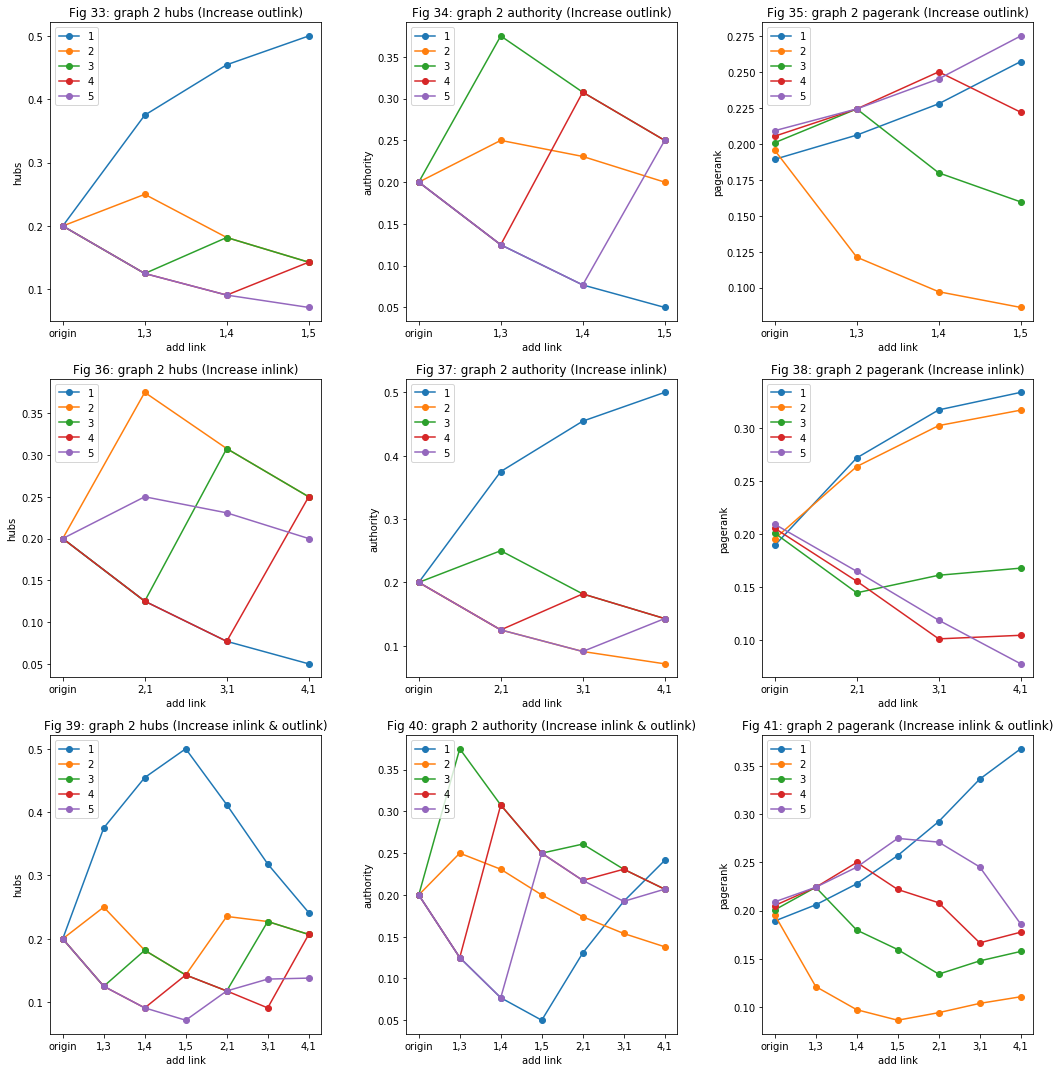

In [213]:
# Fig 10 ~ Fig 18
legends = ['1','2','3','4','5']
plt.figure(figsize=(15, 15))
show_graph_results(legends, 2, 33)

# Plot
plt.tight_layout()
plt.show()


#### b. Graph 2

#####  Increase outlinks of node 1

依序增加 outlinks 如 1,3 1,4 1,5 對於 hub 的影響與 graph1 相同，都會上升，然而 Authority 會逐漸下降而非如 graph1維持不變，pageRank 的部分則會從原數值開始逐漸上升。

#####  Increase inlinks of node 1

由於 Graph 具有 Cycle ，依序增加 inlinks 如 2,1 3,1 4,1 的 hub 結果其實與增加 outlink 時的 authority 相同，然而 PagrRank 的上升幅度則相較增加 Inlinks 時要大。

#####  Increase both outlinks & inlinks of node 1

1,3 1,4 1,5 2,1 3,1 4,1 兩者依序增加時，Hub 的變化趨勢與 Graph 1 類似為先增加後下降，然而 Authority 則是先下降後增加，PageRank 則是持續上升，最終達到比 graph 1 要高的數值。

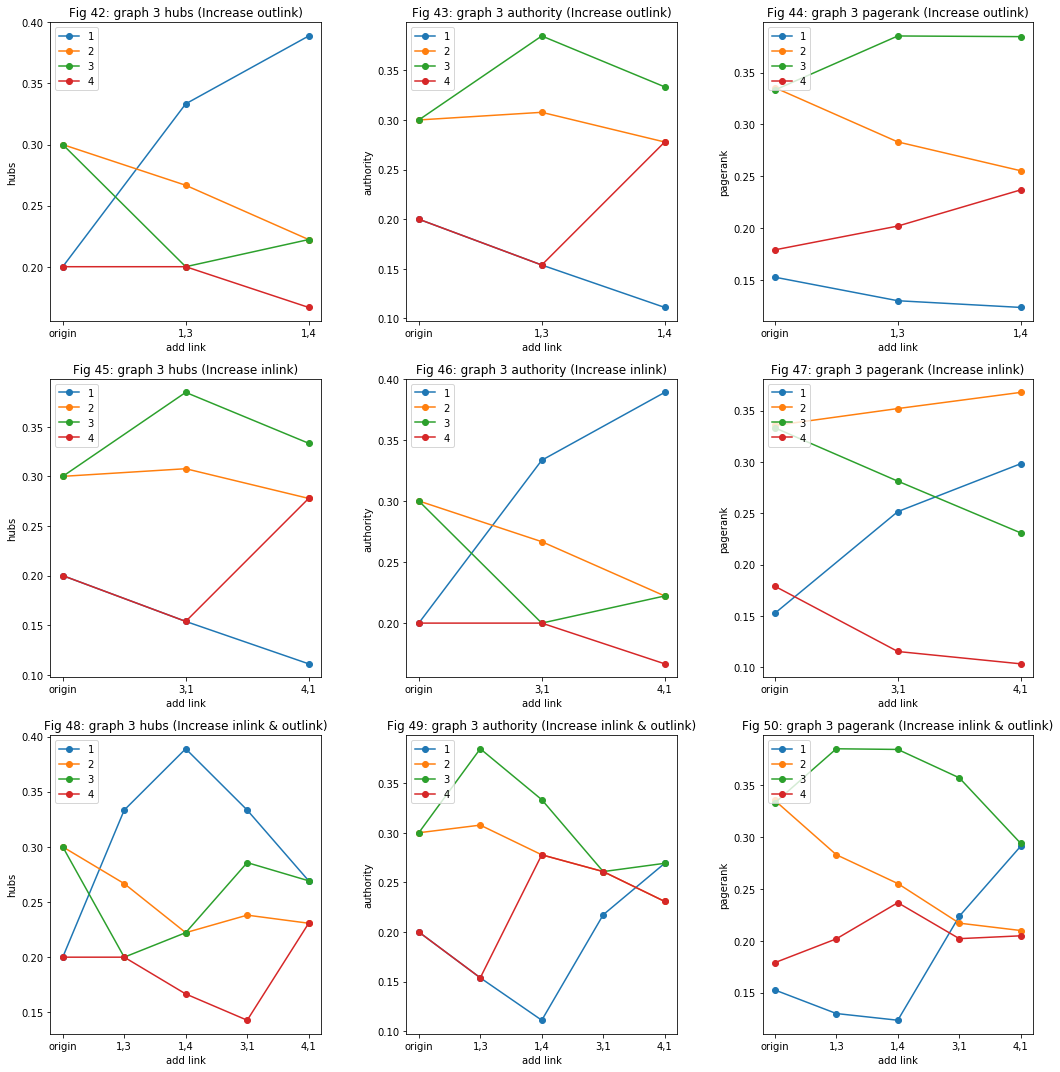

In [214]:
# Fig 19 ~ Fig 27
legends = ['1','2','3','4']
plt.figure(figsize=(15, 15))
show_graph_results(legends, 3, 42)

# Plot
plt.tight_layout()
plt.show()

#### c. Graph 3

##### Increase outlinks of node 1

由於 Graph 3 node 不多，且多具有 Cycle，能增加的 edge 不多，本次實驗依序增加 1,3 1,4 等 outlink edge，其 hub 數值上升，authority 下降這點與 graph 2 相符，然而不同的則是 pagerank 會下降，這是因為 3,4 的 pagerank上升的緣故

#####  Increase inlinks of node 1

在增加 3,1 4,1 等內連 edge 的情況，其 authority 上升，hub下降，pagerank 穩定上升等趨勢與 graph 2 相同，但其 PageRank 依舊沒有比 node 2 要來得高。


#####  Increase both outlinks & inlinks of node 1

依序增加 1,3 1,4 3,1 4,1 的情況下，hub 與 authority 的變化趨勢與 graph 2 類似，hub 先增加後減少，authority 先減少後增加，但 pageRank 最終可達到與 node 4 相同的最高數值。

### 4.4 Performance

graph 4~7 中，HITS 及 PageRank 的運行時間如下表

| graph_id | hit   | pagerank | 
|----------|-------|----------| 
| 4        | 0.126 | 0.135    | 
| 5        | 0.137 | 0.198    | 
| 6        | 0.154 | 2.381    | 
| 7        | 0.181 | 14.31    | 

其中 HITS 的運算時間改變較小，但 PageRank 一旦Edge增加，其運算時間便會指數增加 (E^2)。
而 SimRank 的 Performance 已於 4.2 提到此處不再贅述。

## 5. Conclusion

本次報告實作了三種經典的 Rank 演算法，實驗中發現有 cycle 對於數值影響很高，此外也發現對於 HITS 演算法而言，只要增加幾條 edge 便會對結果產生不小的影響。 而 PageRank 算法雖然較穩定，但其數值 與 Authority 仍具有一定的關聯，至於 SimRank 雖然能有效比對兩 node 之相似性，但其運算成本較高，光是實驗中所用之 Graph 其運算時間便超過 5min，實務上不可能採用。


## 6. Comments

這三種演算法因為都有缺陷所以實務上已不再採用，且實作上有些問題如 cycle 處理課堂上並未詳細提到需要自行解決，這再次提醒了我們課堂上所提到的僅是冰山一角的入門知識，若想深入這領域需要靠自身主動鑽研，而鑽研中實際碰到的問題再與教授及他人討論，從中獲得的才會真正屬於自己。


## 7. References

- [1] Jon M. Kleinberg. Hubs, Authorities, and Communities
- [2] L Page. The PageRank Citation Ranking: Bringing Order to the Web
- [3] Glen Jeh, Jennifer Widom. SimRank: A Measure of Structural-Context Similarity